# Tarea 2. Ejercicio 1.
##### Bibliotecas.

##### !pip install optbinning==0.6.1

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from datetime import date
from dateutil.relativedelta import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)
from sklearn import metrics

Utilizaremos la base de datos con el valor de respuesta generado en la tarea 1 ejercicio 1. Recordemos que el umbral establecido es de no más de 2 pagos incumplidos al año. No obstante en un coloquio actuarial el equipo encontró que en los bancos se tiene la convención de 3 pagos incumplidos al año. 
#### Carga de datos.

In [100]:
DF = pd.read_excel('Base.xlsx',index_col=0)
DF.head()

,Dar_Credito,comp_interno1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,1,0.000000,260.869565,25.854639,56.0,-230.0,0.33522,0.000000,b'0',11,58,2,9,156
1,1,0.000000,40.579710,2.872738,62.0,-230.0,0.33334,0.041039,b'1',28,45,1,4,173
2,1,0.000000,119.000000,-230.000000,0.0,0.0,0.29186,0.000000,b'1',25,45,1,9,170
3,1,0.000000,349.275362,34.616490,94.0,-230.0,0.29112,0.000000,b'1',14,59,3,3,159
4,1,2026.342452,276.811594,27.434645,125.0,-230.0,0.27318,77.422135,b'1',1,67,2,9,146


In [101]:
from optbinning import OptimalBinning

Dividimos la muestra en test y train. Esto con el fin de evaluar nuestro modelo.

In [102]:
train, test = train_test_split(DF, test_size = 0.30, random_state = 100) 
y = train.Dar_Credito

Elegimos el tipo de dato que deseamos en cada columna.

In [103]:
#comp_A son las variables numéricas y comp_B las variables categóricas
comp_A = ['comp_interno1', 'comp_externo1', 'comp_externo2', 'comp_externo3', 'comp_externo4', 'comp_mixto1','inversion']
comp_B = ['comp_interno2', 'comp_interno3', 'comp_interno4', 'categoria1', 'categoria2', 'categoria3']

In [104]:
def tabla_valores(data):
    if data in comp_A:
        optb = OptimalBinning(name = data, dtype = "numerical", solver = "cp", monotonic_trend = "auto_asc_desc")
    elif data in comp_B:
        optb = OptimalBinning(name = data, dtype = "categorical", solver = "mip")
        
    optb.fit(train[data].values, y)
    return optb.binning_table


Con lo que tenemos ahora, utilicemos la función display para observar el WoE y el IV de las variables (además de la suma de cada una, lo utilizaremos después).

In [105]:
for k in (comp_A+comp_B):
    print(k)
    display(tabla_valores(k).build())

comp_interno1


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 1621.07)",23380,0.848362,1692,21688,0.927630,0.03313,0.000945,0.000118
1,"[1621.07, 2960.99)",1867,0.067746,119,1748,0.936261,-0.103126,0.000689,0.000086
2,"[2960.99, inf)",2312,0.083893,123,2189,0.946799,-0.295038,0.006439,0.000802
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.008073,0.001006


comp_externo1


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 40.00)",2526,0.091658,306,2220,0.878860,0.602301,0.043117,0.005310
1,"[40.00, 94.58)",3554,0.128960,381,3173,0.892797,0.464345,0.033979,0.004210
2,"[94.58, 147.03)",3697,0.134149,291,3406,0.921288,0.124007,0.002176,0.000272
3,"[147.03, 219.49)",3637,0.131971,283,3354,0.922189,0.111516,0.001722,0.000215
4,"[219.49, 299.86)",3108,0.112776,178,2930,0.942728,-0.216996,0.004840,0.000604
5,"[299.86, 439.28)",3543,0.128561,182,3361,0.948631,-0.332009,0.012303,0.001531
6,"[439.28, 734.64)",4070,0.147683,190,3880,0.953317,-0.432588,0.023002,0.002853
7,"[734.64, 1103.19)",1843,0.066875,76,1767,0.958763,-0.562327,0.016678,0.002058
8,"[1103.19, inf)",1581,0.057368,47,1534,0.970272,-0.901508,0.032059,0.003877
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


comp_externo2


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 3.91)",2261,0.082042,255,2006,0.887218,0.521344,0.027927,0.003452
1,"[3.91, 6.76)",1782,0.064661,187,1595,0.895062,0.440458,0.015172,0.001881
2,"[6.76, 9.37)",1676,0.060815,167,1509,0.900358,0.382769,0.010512,0.001306
3,"[9.37, 14.57)",3505,0.127182,283,3222,0.919258,0.151667,0.003123,0.000390
4,"[14.57, 21.75)",3579,0.129867,273,3306,0.923722,0.089956,0.001092,0.000137
5,"[21.75, 29.72)",2856,0.103632,156,2700,0.945378,-0.267173,0.006600,0.000823
6,"[29.72, 100.56)",8785,0.318771,459,8326,0.947752,-0.31411,0.027511,0.003425
7,"[100.56, inf)",3115,0.113030,154,2961,0.950562,-0.372352,0.013376,0.001662
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


comp_externo3


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 56.50)",6591,0.239160,885,5706,0.865726,0.720292,0.169217,0.020706
1,"[56.50, 71.50)",2490,0.090352,265,2225,0.893574,0.456196,0.022898,0.002838
2,"[71.50, 79.50)",1739,0.063101,157,1582,0.909718,0.273779,0.005323,0.000663
3,"[79.50, 87.50)",1777,0.064480,134,1643,0.924592,0.077539,0.000401,0.000050
4,"[87.50, 93.50)",1520,0.055154,108,1412,0.928947,0.013347,0.000010,0.000001
5,"[93.50, 104.50)",2724,0.098842,147,2577,0.946035,-0.279971,0.006875,0.000857
6,"[104.50, 112.50)",2453,0.089009,84,2369,0.965756,-0.755428,0.037028,0.004521
7,"[112.50, 119.50)",2467,0.089517,65,2402,0.973652,-1.025692,0.061672,0.007388
8,"[119.50, 125.50)",2514,0.091222,42,2472,0.983294,-1.491135,0.111465,0.012771
9,"[125.50, inf)",3284,0.119163,47,3237,0.985688,-1.648277,0.168157,0.018923


comp_externo4


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, -229.50)",22273,0.808193,1337,20936,0.939972,-0.167064,0.021000,0.002622
1,"[-229.50, inf)",5286,0.191807,597,4689,0.887060,0.522921,0.065732,0.008124
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.086732,0.010746


comp_mixto1


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.27)",2178,0.079030,78,2100,0.964187,-0.709006,0.029509,0.003613
1,"[0.27, 0.31)",3545,0.128633,132,3413,0.962764,-0.668567,0.043415,0.005328
2,"[0.31, 0.32)",1425,0.051707,63,1362,0.955789,-0.489597,0.010074,0.001247
3,"[0.32, 0.33)",1458,0.052905,86,1372,0.941015,-0.185699,0.001685,0.000210
4,"[0.33, 0.34)",1852,0.067201,117,1735,0.936825,-0.112611,0.000812,0.000101
5,"[0.34, 0.36)",6085,0.220799,431,5654,0.929170,0.009968,0.000022,0.000003
6,"[0.36, 0.37)",2842,0.103124,255,2587,0.910274,0.266987,0.008249,0.001028
7,"[0.37, inf)",8174,0.296600,772,7402,0.905554,0.323457,0.035682,0.004441
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


inversion


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 5.94)",20236,0.734279,1573,18663,0.922267,0.11042,0.009389,0.001173
1,"[5.94, 36.06)",2907,0.105483,175,2732,0.939800,-0.164025,0.002645,0.000330
2,"[36.06, 187.96)",2539,0.092130,134,2405,0.947223,-0.303487,0.007456,0.000928
3,"[187.96, inf)",1877,0.068108,52,1825,0.972296,-0.974114,0.043185,0.005194
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.062675,0.007626


comp_interno2


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[b'0'],8247,0.299249,586,7661,0.928944,0.0134,0.000054,0.000007
1,[b'1'],19312,0.700751,1348,17964,0.930199,-0.00577,0.000023,0.000003
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.000077,0.000010


comp_interno3


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[13, 29, 30, 27, 12]",1542,0.055953,212,1330,0.862516,0.74763,0.043149,0.005271
1,"[7, 20, 28, 15, 23]",3768,0.136725,371,3397,0.901539,0.369532,0.021900,0.002722
2,"[17, 24, 8]",1775,0.064407,161,1614,0.909296,0.278912,0.005651,0.000704
3,"[21, 31, 18]",1769,0.064190,137,1632,0.922555,0.106397,0.000761,0.000095
4,"[9, 5, 4, 11]",2440,0.088537,167,2273,0.931557,-0.026884,0.000063,0.000008
5,"[10, 19]",3980,0.144417,245,3735,0.938442,-0.140267,0.002676,0.000334
6,[14],2954,0.107188,175,2779,0.940758,-0.181082,0.003253,0.000406
7,"[25, 26]",1539,0.055844,90,1449,0.941520,-0.194841,0.001950,0.000243
8,"[6, 22]",1859,0.067455,99,1760,0.946746,-0.293971,0.005143,0.000641
9,[1],3927,0.142494,205,3722,0.947797,-0.315028,0.012365,0.001539


comp_interno4


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[27, 31, 38, 39, 37, 60, 58]",1892,0.068653,196,1696,0.896406,0.426065,0.014980,1.858466e-03
1,"[57, 56, 54]",2656,0.096375,232,2424,0.912651,0.237541,0.006025,7.513439e-04
2,"[61, 36, 44]",1519,0.055118,122,1397,0.919684,0.145917,0.001250,1.560768e-04
3,"[53, 63, 55]",2496,0.090569,194,2302,0.922276,0.110303,0.001156,1.443693e-04
4,"[50, 43, 51]",2865,0.103959,213,2652,0.925654,0.062201,0.000413,5.163202e-05
5,"[33, 42, 64, 46]",2140,0.077652,149,1991,0.930374,-0.008468,0.000006,6.934832e-07
6,"[41, 65, 40, 45]",2069,0.075075,141,1928,0.931851,-0.031501,0.000073,9.186478e-06
7,"[66, 47]",1589,0.057658,106,1483,0.933291,-0.054405,0.000167,2.083792e-05
8,"[67, 49]",1579,0.057295,104,1475,0.934136,-0.068044,0.000258,3.219930e-05
9,"[52, 69]",1519,0.055118,98,1421,0.935484,-0.090171,0.000431,5.387533e-05


categoria1


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],12546,0.455241,1112,11434,0.911366,0.253547,0.032649,0.004070
1,"[5, 4, 6, 2]",9077,0.329366,529,8548,0.941721,-0.198486,0.011920,0.001488
2,[3],5936,0.215392,293,5643,0.950640,-0.37402,0.025701,0.003194
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.070270,0.008752


categoria2


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[13, 4, 1, 10, 6]",4728,0.171559,487,4241,0.896997,0.419688,0.036222,0.004495
1,"[7, 8]",1679,0.060924,125,1554,0.925551,0.063704,0.000254,0.000032
2,[3],1746,0.063355,112,1634,0.935853,-0.096309,0.000564,0.000070
3,[9],17686,0.641750,1132,16554,0.935995,-0.098664,0.005988,0.000748
4,"[5, 11, 2, 12]",1720,0.062412,78,1642,0.954651,-0.462983,0.010995,0.001362
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.054023,0.006707


categoria3


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[158, 174, 175, 172, 157]",1542,0.055953,212,1330,0.862516,0.74763,0.043149,0.005271
1,"[152, 165, 173, 160, 168]",3768,0.136725,371,3397,0.901539,0.369532,0.021900,0.002722
2,"[162, 169, 153]",1775,0.064407,161,1614,0.909296,0.278912,0.005651,0.000704
3,"[166, 176, 163]",1769,0.064190,137,1632,0.922555,0.106397,0.000761,0.000095
4,"[154, 150, 149, 156]",2440,0.088537,167,2273,0.931557,-0.026884,0.000063,0.000008
5,"[155, 164]",3980,0.144417,245,3735,0.938442,-0.140267,0.002676,0.000334
6,[159],2954,0.107188,175,2779,0.940758,-0.181082,0.003253,0.000406
7,"[170, 171]",1539,0.055844,90,1449,0.941520,-0.194841,0.001950,0.000243
8,"[151, 167]",1859,0.067455,99,1760,0.946746,-0.293971,0.005143,0.000641
9,[146],3927,0.142494,205,3722,0.947797,-0.315028,0.012365,0.001539


Quitamos todas las columnas donde $$\sum IV < 2\%$$ Es decir no utilizaremos las variables que no están aportando mucha información.

De igual forma, eliminaremos las columnas  donde $$\sum IV > 50\%$$ Pues son "demasiado buenas" para ser verdad.

In [107]:
IV = pd.DataFrame(columns=['Variable', 'IV_total'])

for k in (comp_A+comp_B):
    tabla = tabla_valores(k)
    tabla_2 = tabla.build()
    IV = IV.append({'Variable': k, 'IV_total':tabla_2.loc["Totals", "IV"]}, ignore_index=True)
IV["IV_total < 2%"] = (IV["IV_total"] < 0.02) 
IV["IV_total > 50%"] = (IV["IV_total"] > 0.5)
IV

,Variable,IV_total,IV_total < 2%,IV_total > 50%
0,comp_interno1,0.008073,True,False
1,comp_externo1,0.169876,False,False
2,comp_externo2,0.105315,False,False
3,comp_externo3,0.583045,False,True
4,comp_externo4,0.086732,False,False
5,comp_mixto1,0.129448,False,False
6,inversion,0.062675,False,False
7,comp_interno2,0.000077,True,False
8,comp_interno3,0.123939,False,False
9,comp_interno4,0.053477,False,False


Notemos que solamente el comp_interno1 y comp_interno2 tiene un IV menor del 2%, por lo cual, no tomaremos en cuenta estos datos.

Tampoco tomaremos en cuenta a comp_externo3, pues su IV es mayor al 50%.

In [108]:
#Actualizamos los componentes correspondientes
comp_A = ['comp_externo1', 'comp_externo2', 'comp_externo4', 'comp_mixto1','inversion']
comp_B = ['comp_interno3', 'comp_interno4', 'categoria1', 'categoria2', 'categoria3']

Ahora revisemos la tasa de personas a las que no se les dio crédito basado en cada variable.

Para el componente interno, notamos que las variables "normales" la tendencia de la tasa es creciente pero no crece con fuerza. Sin embargo con los WoEs tenemos que a medida que el componente externo 1 crece la tasa de "malos" baja. 

El comporamiento descrito anteriormente, se comporta igual para el resto de variables.

In [109]:
def grafica_event_rate_A(data, metrica):
    if data in comp_A:
        optb = OptimalBinning(name = data, dtype = "numerical", solver = "cp", monotonic_trend = "auto_asc_desc")
    elif data in comp_B:
        optb = OptimalBinning(name = data, dtype = "categorical", solver = "mip")
    optb.fit(train[data].values, y)
    tabla = optb.binning_table
    tabla.build()
    return tabla.plot(metric = metrica)

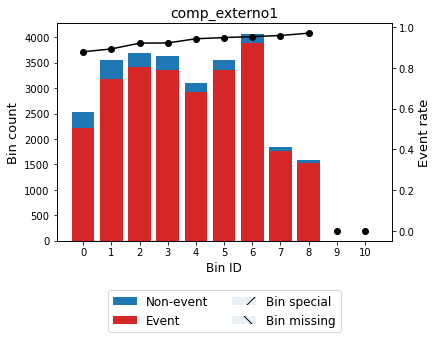

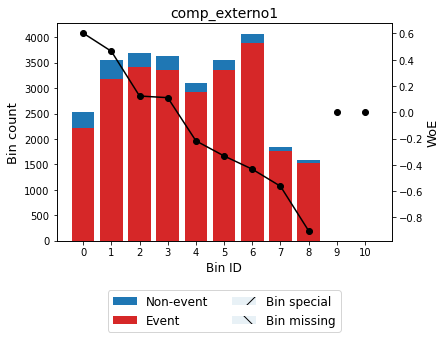

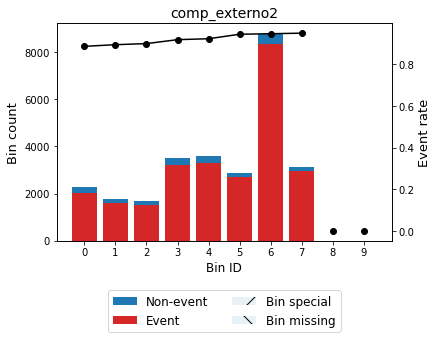

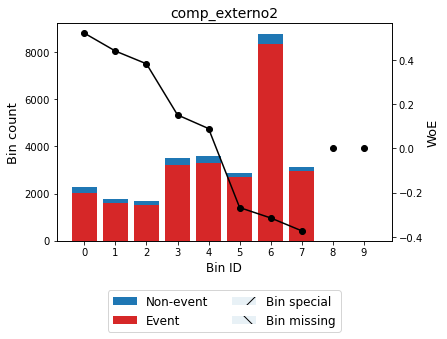

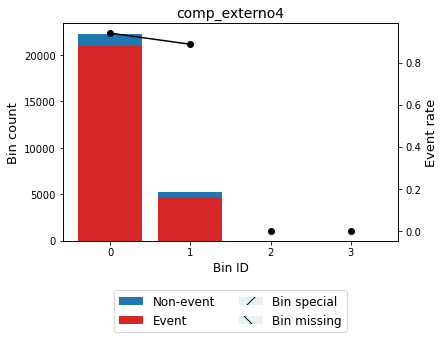

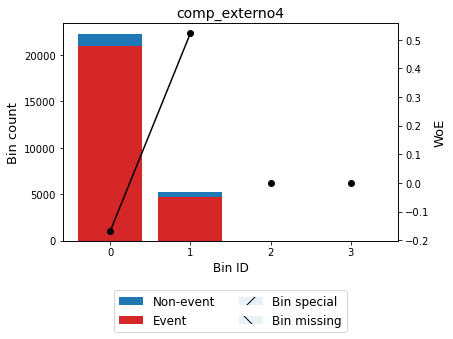

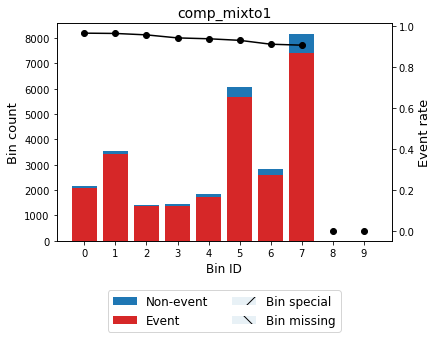

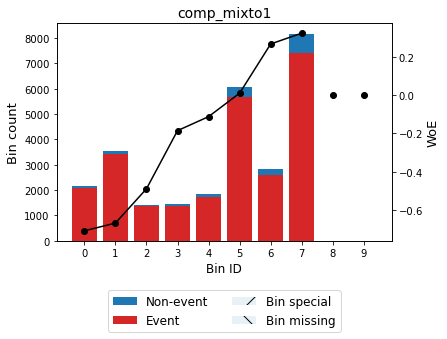

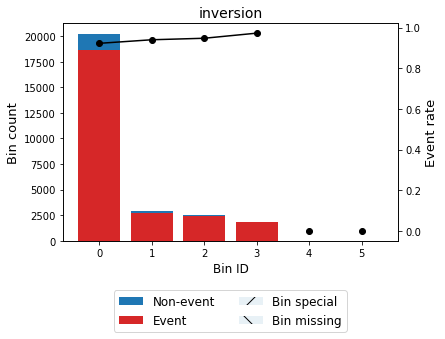

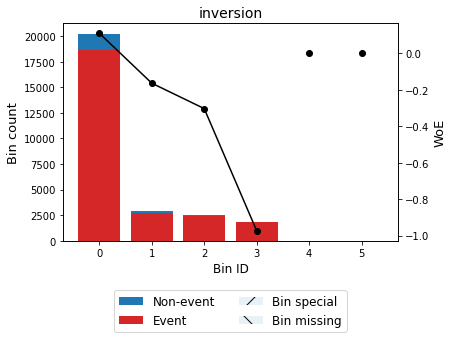

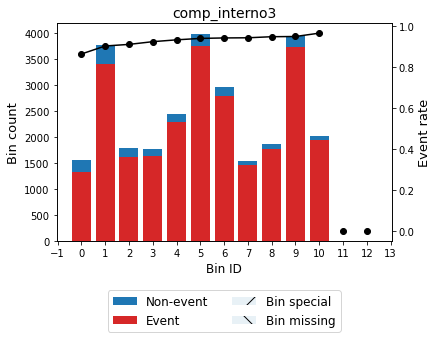

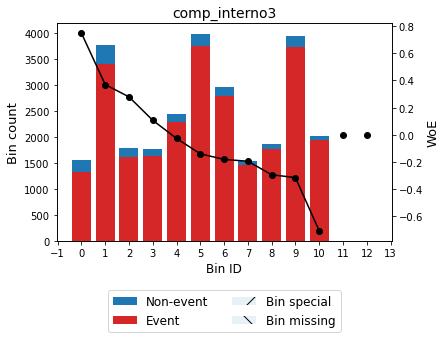

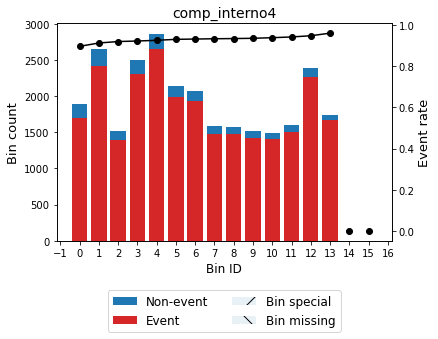

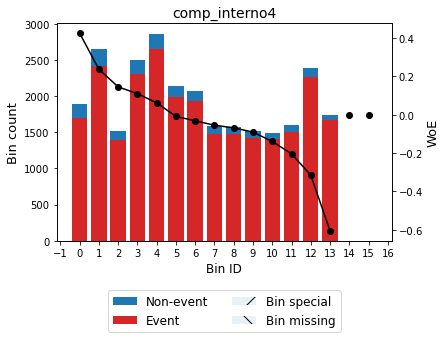

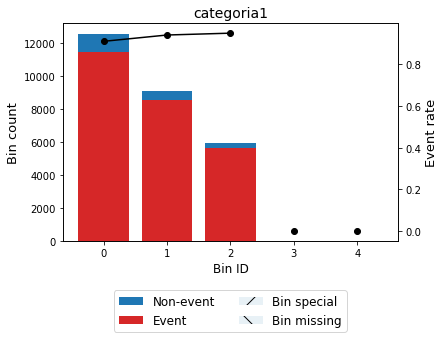

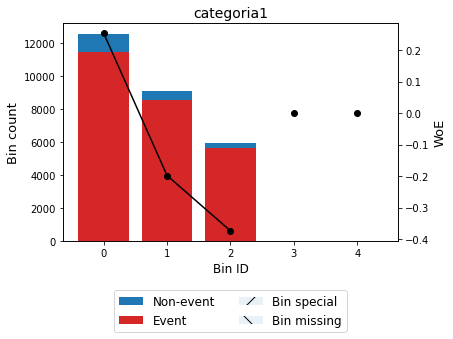

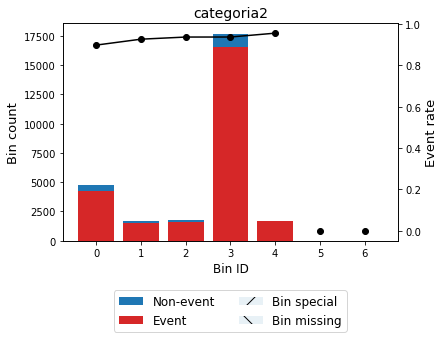

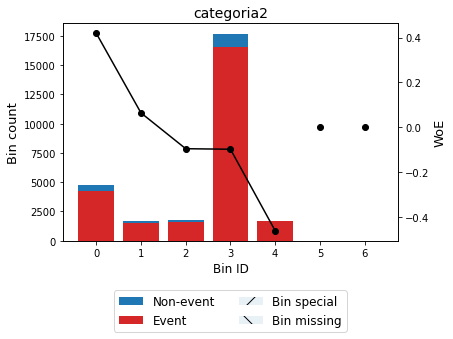

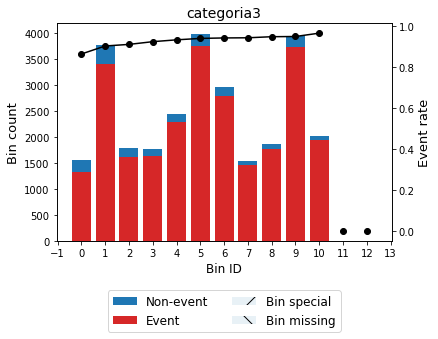

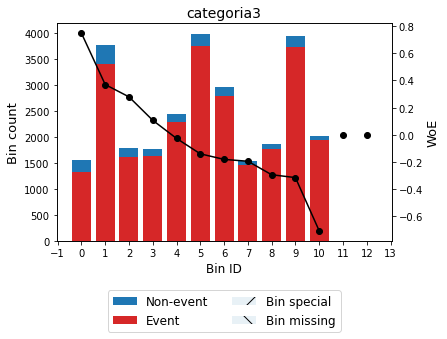

In [110]:
for k in (comp_A+comp_B):
    tabla = tabla_valores(k)
    tabla.build()
    tabla.plot(metric = "event_rate")
    tabla.plot(metric = "woe")

Ya que analizamos los WoEs, anexemos la información a nuestro data set.

In [111]:
#Transformamos las variables a woe
for data in (comp_A+comp_B):
    if data in comp_A:
        optb = OptimalBinning(name = data, dtype = "numerical", solver = "cp", monotonic_trend = "auto_asc_desc")
    elif data in comp_B:
        optb = OptimalBinning(name = data, dtype = "categorical", solver = "mip")
        
    optb.fit(train[data].values, y)
    tabla = optb.binning_table
    tabla.build()
    train["woe_"+data] = optb.transform(train[data], metric = "woe")
    test["woe_"+data] = optb.transform(test[data], metric = "woe")


In [112]:
train.head()

,Dar_Credito,comp_interno1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,comp_interno2,comp_interno3,...,woe_comp_externo1,woe_comp_externo2,woe_comp_externo4,woe_comp_mixto1,woe_inversion,woe_comp_interno3,woe_comp_interno4,woe_categoria1,woe_categoria2,woe_categoria3
9143,1,4559.270517,165.217391,132.000000,-230.0,0.0,0.38000,40.610105,b'1',18,...,0.111516,-0.372352,0.522921,0.323457,-0.303487,0.106397,-0.090171,0.253547,-0.098664,0.106397
33239,1,1013.171226,318.840580,31.600115,132.0,-230.0,0.26124,640.891482,b'1',3,...,-0.332009,-0.314110,-0.167064,-0.709006,-0.974114,-0.706702,0.145917,0.253547,-0.098664,-0.706702
39274,1,0.000000,28.985507,80.000000,-229.0,0.0,0.30618,0.000000,b'0',24,...,0.602301,-0.314110,0.522921,-0.668567,0.110420,0.278912,0.110303,0.253547,0.419688,0.278912
233,1,3799.392097,282.608696,28.009193,119.0,-230.0,0.34000,1710.095391,b'1',22,...,-0.216996,-0.267173,-0.167064,0.009968,-0.974114,-0.293971,0.110303,-0.198486,-0.098664,-0.293971
21740,1,0.000000,304.347826,30.163746,69.0,-230.0,0.37084,109.213967,b'1',14,...,-0.332009,-0.314110,-0.167064,0.323457,-0.303487,-0.181082,-0.203287,0.253547,0.419688,-0.181082


Veamos el correlograma de las variables.En caso de que exista mucha correlación, eliminaremos las que tengan el IV más pequeño.

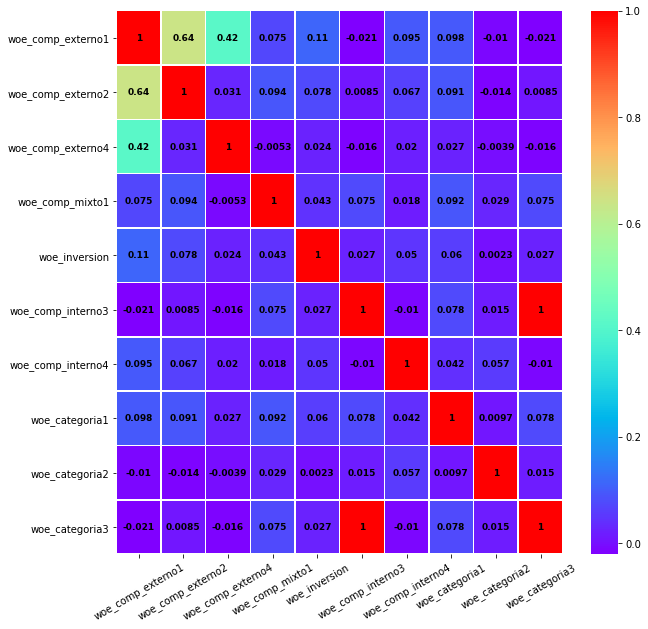

In [113]:
corr = train.iloc[:,14:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

Ahora quitamos una de las variables en donde se tiene que $$|corr|\geq 0.5$$ y la IV es menor. Es decir woe_comp_externo2 y woe_categoria3.

In [114]:
train = train.drop(["woe_comp_externo2","woe_categoria3"],axis=1)
test = test.drop(["woe_comp_externo2","woe_categoria3"],axis=1)

Analicemos el correlograma con las variables que aún nos quedan.
Notemos que la correlación una a una es "pequeña".

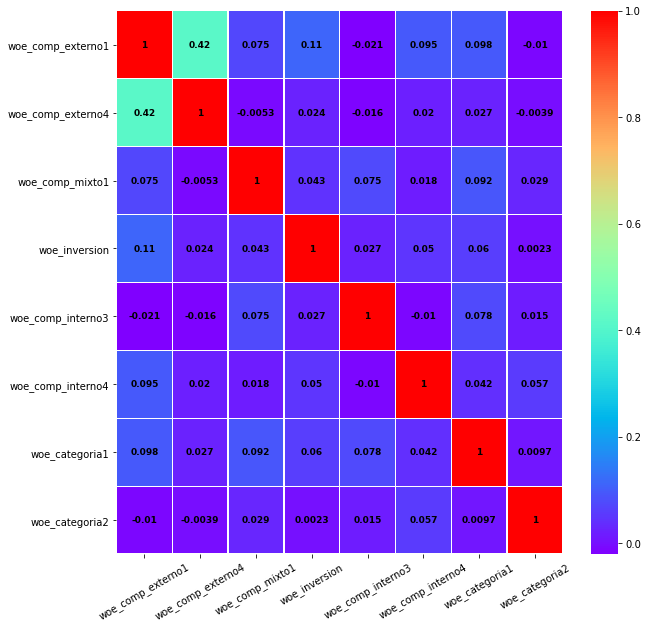

In [115]:
corr = train.iloc[:,14:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

# Modelo.

Ahora si, generemos el modelo y después observaremos las métricas para evaluarlo.

In [116]:
X_woe_train=train.iloc[:,14:]
y_train=train.iloc[:,0]

In [117]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

### Train.

Evaluemos el modelo con la muestra train.
Tenemos un AUC de 0.69, Gini de 37% y KS de 27%. Es decir, parece ser un buen modelo, veamos que ocurre con la muestra test.

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [2.0473149  4.6817601  1.44519148 ... 2.97322546 2.47029979 3.98268609]


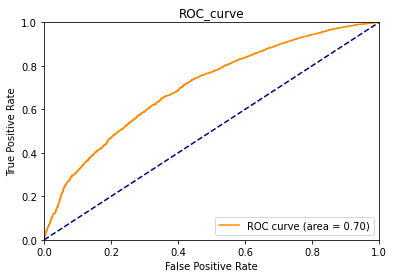

0.40909094761268205


In [118]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

GINI = (2 * roc_auc) - 1
print(GINI)

In [119]:
#Obtenemos el predict
y_pr_fit= clf.predict_proba(X_woe_train)
len(y_pr_fit[:,0])
df_predicts=y_train.to_frame()
df_predicts['estimado']=y_pr_fit[:,1]
df_predicts
#Construcción de Scorecard
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp
#KS
ecdf_malos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==0.0,'estimado'])
ecdf_buenos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==1.0,'estimado'])
grid_score=np.sort(df_predicts.estimado.unique())
prob_acum_buenos=ecdf_buenos(grid_score)
prob_acum_malos=ecdf_malos(grid_score)
abs_dif=np.abs(prob_acum_buenos-prob_acum_malos)
KS= np.max (abs_dif)
KS

0.2999385779504125

### Test.

Tenemos un AUC de 0.65, Gini de 30% y KS de 22%. Es decir, parece ser un buen modelo, veamos que ocurre con la muestra test.

In [120]:
X_woe_test=test.iloc[:,14:]
y_test=test.iloc[:,0]

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [2.88805333 2.47899211 3.50069228 ... 2.44811144 1.85005358 3.81171354]


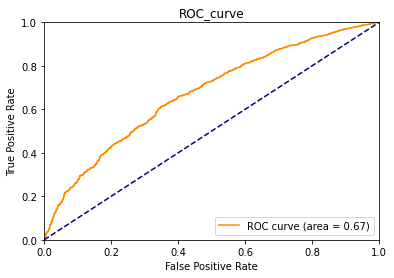

0.3452695405514423


In [121]:
y_pred=clf.predict(X_woe_test)
y_pred1=clf.decision_function(X_woe_test)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

GINI = (2 * roc_auc) - 1
print(GINI)

#El gini es sospechoso si es menor al 35%

In [122]:
#Obtenemos el predict
y_pr_fit= clf.predict_proba(X_woe_test)
len(y_pr_fit[:,0])
df_predicts=y_test.to_frame()
df_predicts['estimado']=y_pr_fit[:,1]
df_predicts
#Construcción de Scorecard
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp
#KS
ecdf_malos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==0.0,'estimado'])
ecdf_buenos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==1.0,'estimado'])
grid_score=np.sort(df_predicts.estimado.unique())
prob_acum_buenos=ecdf_buenos(grid_score)
prob_acum_malos=ecdf_malos(grid_score)
abs_dif=np.abs(prob_acum_buenos-prob_acum_malos)
KS= np.max (abs_dif)
KS

0.2629947142350883

Finalmente realicemos validación cruzada para el AUC con la muestra test.

In [123]:
k_fold_test = StratifiedKFold(5, shuffle=True, random_state=42)
cross_val_test = cross_val_score(clf, X_woe_test, y_test, cv=k_fold_test)
validacion_test = cross_validate(clf, X_woe_test, y_test, cv=k_fold_test,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])
# Media de Roc-Auc en validación de test.
roc_auc_array=validacion_test['test_roc_auc']
roc_auc_array.mean()

0.6715504542262354